Saving PCOS_data_without_infertility.xlsx to PCOS_data_without_infertility (2).xlsx
Initial Object Columns and their unique types:
Column 'II    beta-HCG(mIU/mL)' has types: [<class 'float'> <class 'int'> <class 'str'>]
  Sample non-numeric/non-float values in 'II    beta-HCG(mIU/mL)':
  ['1.99.']
Column 'AMH(ng/mL)' has types: [<class 'float'> <class 'int'> <class 'str'>]
  Sample non-numeric/non-float values in 'AMH(ng/mL)':
  ['a']

Attempting to convert column 'AMH(ng/mL)' to numeric...
  Found non-numeric values in 'AMH(ng/mL)' before coercion:
  ['a']
  Dtype of 'AMH(ng/mL)' after conversion attempt: float64
  NaN count in 'AMH(ng/mL)' after coercion: 1
  Imputing NaNs in 'AMH(ng/mL)' with mean value: 5.62
  NaN count in 'AMH(ng/mL)' after imputation: 0

Columns remaining with object dtype for Encoding:
- II    beta-HCG(mIU/mL)
  Unique types: [<class 'float'> <class 'int'> <class 'str'>]
  Sample unique values: [1.99 494.08 801.45 100.51 158.51 1214.23 91.55 749.98 218.65 13]
  

<ipython-input-5-7018af30adc2>:94: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


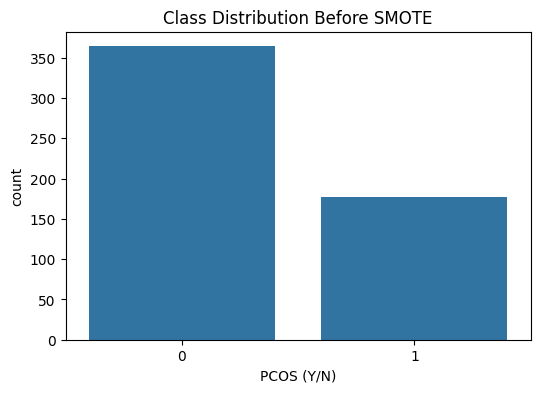


Data Types of X before SMOTE:
Sl. No                      int64
Patient File No.            int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)      int64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)       

<ipython-input-5-7018af30adc2>:197: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(mean_value, inplace=True)


Found numeric columns with NaNs: ['BMI', 'Marraige Status (Yrs)', 'FSH/LH', 'Waist:Hip Ratio', 'Fast food (Y/N)']
  Imputing 299 NaNs in 'BMI' with mean value: 23.93
  Imputing 1 NaNs in 'Marraige Status (Yrs)' with mean value: 7.68
  Imputing 532 NaNs in 'FSH/LH' with mean value: 3.04
  Imputing 532 NaNs in 'Waist:Hip Ratio' with mean value: 0.85
  Imputing 1 NaNs in 'Fast food (Y/N)' with mean value: 0.51
NaN imputation complete for remaining numeric columns.

No NaN values found in X. Proceeding with SMOTE.


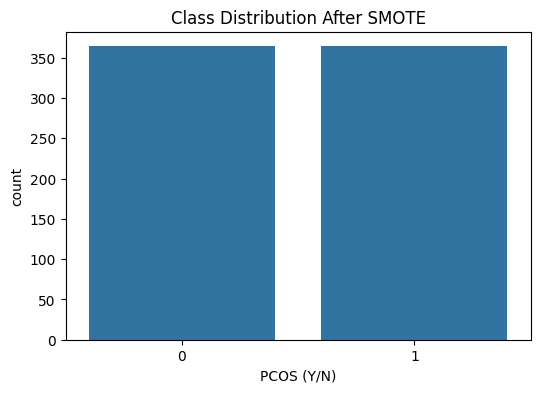

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
from IPython import get_ipython
from IPython.display import display
# %%
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import numpy as np # Import numpy for isnan check

# Ensure required packages are installed
try:
    import openpyxl
except ImportError:
    !pip install openpyxl
    import openpyxl

try:
    import imblearn
except ImportError:
    !pip install imbalanced-learn
    import imblearn


# Upload file from your computer
uploaded = files.upload()

# Get the filename from uploaded files
file_name = list(uploaded.keys())[0]

# Read the Excel file
df = pd.read_excel(file_name, engine='openpyxl')

# Drop unnamed columns if any
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Inspect columns with object dtype for mixed types
object_cols_initial = df.select_dtypes(include='object').columns

print("Initial Object Columns and their unique types:")
for col in object_cols_initial:
    unique_types = df[col].apply(type).unique()
    print(f"Column '{col}' has types: {unique_types}")
    # Print non-numeric values for inspection if mixed
    if len(unique_types) > 1:
         print(f"  Sample non-numeric/non-float values in '{col}':")
         non_numeric_values = df[col][~df[col].apply(lambda x: isinstance(x, (int, float)))]
         # Print unique values, but handle potential NaNs explicitly if they are objects
         unique_non_numeric = non_numeric_values.unique()
         # Filter out numpy NaN if it's present as an object type
         unique_non_numeric_filtered = [val for val in unique_non_numeric if not (isinstance(val, float) and np.isnan(val)) and val is not None]
         print(f"  {unique_non_numeric_filtered}")


# --- Start of suggested changes ---

# Identify columns that should potentially be numeric but have object dtype
# Based on the traceback and initial inspection, 'II beta-HCG(mIU/ml)'
# is the likely candidate with mixed types. Add other similar columns if found
# based on the initial inspection results.
# Let's include 'AMH(ng/mL)' as well if it showed mixed types, as the error value
# '1.99.' looks more like an AMH value based on common sense ranges.
# IMPORTANT: The traceback and global variables confirmed 'AMH(ng/mL)' had 'a' which became NaN.
# Make sure this column is included here.
potential_numeric_object_cols = ['II    beta-HCG(mIU/ml)', 'AMH(ng/mL)'] # Added AMH based on error value format

# List to keep track of columns that were successfully converted to numeric
converted_numeric_cols = []

for col in potential_numeric_object_cols:
    if col in df.columns and df[col].dtype == 'object':
        print(f"\nAttempting to convert column '{col}' to numeric...")
        # Check values that would cause errors BEFORE conversion
        non_numeric_values = df[col][pd.to_numeric(df[col], errors='coerce').isna() & df[col].notna()]
        if not non_numeric_values.empty:
            print(f"  Found non-numeric values in '{col}' before coercion:")
            print(f"  {non_numeric_values.unique()}")

        # Attempt to convert to numeric, coercing errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # After conversion, check the dtype again
        print(f"  Dtype of '{col}' after conversion attempt: {df[col].dtype}")

        # Check if the conversion resulted in a numeric type
        if pd.api.types.is_numeric_dtype(df[col]):
             converted_numeric_cols.append(col)
             # --- IMPUTATION STEP ALREADY EXISTED HERE ---
             # Handle NaNs after conversion by imputing with the mean
             if df[col].isna().sum() > 0:
                 mean_value = df[col].mean()
                 print(f"  NaN count in '{col}' after coercion: {df[col].isna().sum()}")
                 print(f"  Imputing NaNs in '{col}' with mean value: {mean_value:.2f}")
                 df[col].fillna(mean_value, inplace=True)
                 print(f"  NaN count in '{col}' after imputation: {df[col].isna().sum()}")
             # --- END IMPUTATION STEP ---
        else:
             print(f"  Column '{col}' did not become numeric after coercion. It remains as {df[col].dtype}")


# Identify genuine categorical columns that are still of object dtype after attempting numeric conversion.
# These should ideally contain only string-like entries or values
# that can be consistently converted to strings.
# Exclude columns that were successfully converted to numeric from this list
categorical_cols_to_encode = df.select_dtypes(include='object').columns

print("\nColumns remaining with object dtype for Encoding:")
for col in categorical_cols_to_encode:
    print(f"- {col}")
    # Before encoding, let's inspect the unique values and types one last time
    unique_vals = df[col].unique()
    unique_types_before_encode = df[col].apply(type).unique()
    print(f"  Unique types: {unique_types_before_encode}")
    print(f"  Sample unique values: {unique_vals[:min(10, len(unique_vals))]}") # Print up to 10 unique values

    # Ensure all values in these columns are strings or representable as strings for LabelEncoder.
    # LabelEncoder can handle None/NaN, but mixed types like strings and numbers *not* intended
    # for numeric conversion can cause issues if they are not consistently strings or numbers.
    # A safe approach is to convert to string if the column is truly categorical,
    # but be mindful this might not be appropriate if it was a numeric column that failed coercion.
    # Given the error is 'could not convert string to float', the string '1.99.' was likely
    # in a column intended for numeric conversion that wasn't in potential_numeric_object_cols
    # or failed coercion silently and then wasn't handled by LabelEncoder appropriately (e.g.,
    # if LabelEncoder was applied to a column that still had a mix of numbers and the string).

    # Let's explicitly convert to string before encoding for categorical columns.
    # This might lose numeric information if applied incorrectly, but it will
    # prevent the `ValueError` during the later numeric conversion by SMOTE.
    # Evaluate if this is the correct approach based on your data's nature.
    print(f"  Converting column '{col}' to string type before encoding...")
    # Fill NaN/None in object columns with a placeholder string like '' before converting to str
    # This ensures .astype(str) doesn't produce the string 'nan' from actual Python None or pandas NaT
    # if those were somehow present before. For numpy NaN already in object dtype, .astype(str) makes 'nan'.
    # Using fillna('') here prevents actual NaNs that were *not* converted from numeric coercion
    # but existed in original object cols from causing issues with LabelEncoder later if it
    # doesn't like mixing None/NaN with strings.
    df[col] = df[col].fillna('').astype(str)
    print(f"  Dtype after converting to string: {df[col].dtype}")

    print(f"  Encoding column: {col}")
    # Apply LabelEncoder now that the column is guaranteed to be strings (or NaNs converted to '' string)
    try:
        # LabelEncoder will now encode the strings, including the placeholder '' if used.
        df[col] = LabelEncoder().fit_transform(df[col])
        print(f"  Dtype after encoding: {df[col].dtype}")
    except TypeError as e:
        print(f"  Error encoding column '{col}': {e}")
        print("  This column likely still contains unhandleable mixed types even after converting to string.")
        # If this happens, inspect the data carefully.


# --- End of suggested changes ---


# Define target variable
target_col = 'PCOS (Y/N)'

# Plot class distribution before SMOTE (using the potentially modified df)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=target_col)
plt.title("Class Distribution Before SMOTE")
plt.savefig("class_distribution_before_smote.png")
plt.show()

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Ensure all columns in X are numeric. SMOTE requires numerical input.
# Check dtypes before SMOTE application
print("\nData Types of X before SMOTE:")
print(X.dtypes)

# Final check for non-numeric types in X before SMOTE
non_numeric_cols_in_X = X.select_dtypes(exclude=np.number).columns
if not non_numeric_cols_in_X.empty:
    print("\nERROR: X still contains non-numeric columns before SMOTE:")
    print(non_numeric_cols_in_X)
    # Print sample values from problematic columns
    for col in non_numeric_cols_in_X:
        print(f"Sample values from non-numeric column '{col}':")
        print(X[col].unique()[:min(10, len(X[col].unique()))]) # Print first 10 unique values

    raise ValueError("X contains non-numeric columns. Please clean data before applying SMOTE.") # Stop execution

# --- ADDED IMPUTATION FOR REMAINING NUMERIC COLUMNS WITH NaNs ---
print("\nChecking for and imputing NaNs in remaining numeric columns...")
# Identify numeric columns that still have NaNs
numeric_cols_with_nan = X.select_dtypes(include=np.number).columns[X.select_dtypes(include=np.number).isnull().any()]

if not numeric_cols_with_nan.empty:
    print(f"Found numeric columns with NaNs: {list(numeric_cols_with_nan)}")
    for col in numeric_cols_with_nan:
        # Impute NaNs with the mean of the column
        mean_value = X[col].mean()
        print(f"  Imputing {X[col].isnull().sum()} NaNs in '{col}' with mean value: {mean_value:.2f}")
        X[col].fillna(mean_value, inplace=True)
    print("NaN imputation complete for remaining numeric columns.")
else:
    print("No additional numeric columns with NaNs found.")
# --- END ADDED IMPUTATION ---


# --- Original NaN CHECK (Now it should pass if imputation worked) ---
# Final check for NaNs in numeric columns before SMOTE
if X.isnull().values.any():
    print("\nERROR: X still contains NaN values in numeric columns before SMOTE:")
    # Print columns with NaNs and their counts
    nan_cols = X.columns[X.isnull().any()].tolist()
    print(f"Columns with NaNs: {nan_cols}")
    for col in nan_cols:
        print(f"  Column '{col}': {X[col].isnull().sum()} NaNs")
    raise ValueError("X contains NaN values. Please handle missing data before applying SMOTE.")
else:
    print("\nNo NaN values found in X. Proceeding with SMOTE.")
# --- END Original NaN CHECK ---


# Apply SMOTE
# SMOTE requires all features (X) to be numeric and without NaNs.
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Create resampled DataFrame
resampled_df = pd.DataFrame(X_res, columns=X.columns)
resampled_df[target_col] = y_res

# Plot class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(data=resampled_df, x=target_col)
plt.title("Class Distribution After SMOTE")
plt.savefig("class_distribution_after_smote.png")
plt.show()

# Optionally download the plots
files.download("class_distribution_before_smote.png")
files.download("class_distribution_after_smote.png")

PR AUC: 0.9779
Average Precision Score (AP): 0.9780


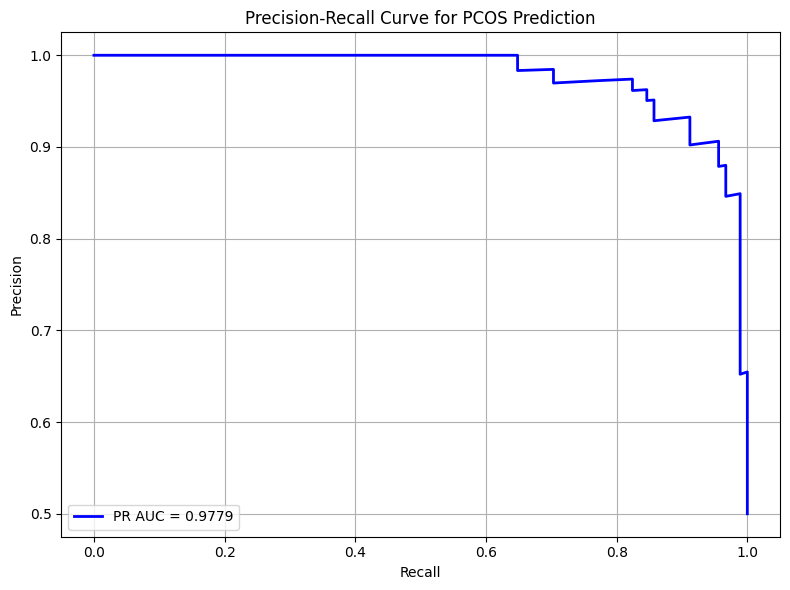

In [6]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt

# Make sure this is the probability of the positive class
# Example: y_pred_prob = ensemble_model.predict_proba(X_test)[:, 1]

# Precision-Recall metrics
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc_score = auc(recall, precision)
avg_precision = average_precision_score(y_test, y_pred_prob)

# Output scores
print(f"PR AUC: {pr_auc_score:.4f}")
print(f"Average Precision Score (AP): {avg_precision:.4f}")

# Plotting Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', linewidth=2, label=f'PR AUC = {pr_auc_score:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for PCOS Prediction')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()
